In [164]:
import pandas as pd
data=pd.read_csv("0000000000002429_training_titanic_x_y_train.csv",delimiter=",")
data.head
col=data.columns
col

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [165]:
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.00,1,0,228414,26.0000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.00,0,0,250655,26.0000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.00,0,4,349909,21.0750,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
5,3,"Lemberopolous, Mr. Peter L",male,34.50,0,0,2683,6.4375,NaN,C,0
6,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,1
7,3,"Jonkoff, Mr. Lalio",male,23.00,0,0,349204,7.8958,NaN,S,0
8,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
9,3,"Rouse, Mr. Richard Henry",male,50.00,0,0,A/5 3594,8.0500,NaN,S,0


<function matplotlib.pyplot.show(*args, **kw)>

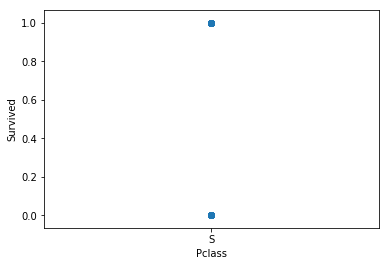

In [166]:
F_data=data[data.Embarked == "S"]
S_data=F_data.Survived
E_data=F_data.Embarked
import matplotlib.pyplot as plt
plt.scatter(E_data,S_data)
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show

In [167]:
print(data[data.Embarked == "S"].Embarked.count())
print(data[data.Embarked == "Q"].Embarked.count())
print(data[data.Embarked == "C"].Embarked.count())

484
50
133


In [168]:
data.isnull().sum()
X1=data[data.Sex == "male"]
X2=data[data.Sex == "female"]

m_live=X1[X1.Survived == 1]
f_live=X2[X2.Survived == 1]

m_die=X1[X1.Survived == 0]
f_die=X2[X2.Survived == 0]

In [169]:
print(X1.shape)
print(X2.shape)
print(m_live.shape)
print(f_live.shape)

(427, 11)
(241, 11)
(89, 11)
(180, 11)


In [170]:
def f(str):
    if str == "male":
        return 0
    else:
        return 1

In [171]:
def Str_Conv(data):
    data["Gender"]=data.Sex.apply(f)
    del data["Sex"]

In [172]:
def Change_Embark(data):
    data.Embarked.fillna(1,inplace=True)
    data.loc[data.Embarked == "S","Embarked"] = 1
    data.loc[data.Embarked == "C","Embarked"] = 2
    data.loc[data.Embarked == "Q","Embarked"] = 3
    

In [173]:
Change_Embark(data)
Str_Conv(data)

In [174]:
X=data[["Gender","Embarked"]]
Y=data["Survived"]

In [175]:
print(X.shape)
print(Y.shape)

(668, 2)
(668,)


In [176]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="sag")
clf.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [177]:
clf.predict(X)
clf.score(X,Y)

0.7754491017964071

In [178]:
data2=pd.read_csv("0000000000002429_test_titanic_x_test.csv",delimiter=",")
data2.shape

(223, 10)

In [179]:
Change_Embark(data2)
Str_Conv(data2)
Y_pred = data2[["Gender","Embarked"]]

In [180]:
Sur_pred = clf.predict(Y_pred)

In [181]:
Sur_pred.shape

(223,)

In [184]:
import numpy as np
np.savetxt("Titanic_Pred.csv",Sur_pred,delimiter=",")